# Imports

In [1]:
import numpy as np
from scipy import special
from scipy import stats
import scipy
from scipy.ndimage.filters import gaussian_filter1d

# Manuscript code
from seroprevalence import *

# Figures
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from util import *

# Prevalence Inference (one population)

We have provided a calculator online, but to do the same calculations in a notebook so that they can be used in analysis, example code is given here.

## Serological Test Kit Parameters

Adjust as needed. We start with [sensingself.me/covid.php](sensingself.me/covid.php) IgG parameters of sensitivity 0.93 and specificity 0.975.  

In [2]:
sensitivity = 0.93
specificity = 0.975
# for convenience, swap to false positive fp and false negative fn.
fp = 1-specificity
fn = 1-sensitivity

# Input Data

In [13]:
# Here's where we can put the outcomes of a serological survey
pos = 321
neg = 1234

# Perform inference: draw from seroprevalence posterior

In [14]:
# Number of Monte Carlo Samples
n_mc_samples = 10000
seroprevalence_samples = sample_post_r_log(pos,neg,fp,fn,size=n_mc_samples)

# Compute credible interval

In [15]:
# Let's get the 90% CI.  You could swap to a 95% or other CI here.
CI_width = 90
CI = np.percentile(seroprevalence_samples,[(100-CI_width)/2,100-(100-CI_width)/2])
print('The {}% CI is:\t[{:.4f},{:.4f}]'.format(CI_width,CI[0],CI[1]))

The 90% CI is:	[0.1823,0.2200]


# Compute posterior mean

In [16]:
post_mean = seroprevalence_samples.mean()
print('The posterior mean is:\t{:.4f}'.format(post_mean))

The posterior mean is:	0.2009


# Plot Results

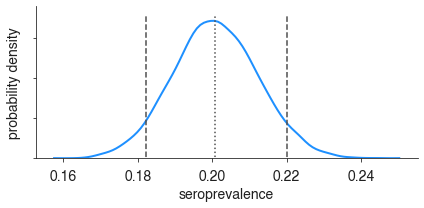

In [17]:
# Important stuff first: colors
dark_grey = [.3,.3,.3]
colors = ['dodgerblue']
bin_width=0.6
lw=2
alph = 0.12

# Set up some axes
fig, ax = plt.subplots(nrows=1, ncols=1, 
                        figsize=(6,3),)

#1. Plot seroprevalence posterior
counts, bins = np.histogram(seroprevalence_samples,
                            bins=100,
                            density=True,)
midpoints = (bins[:-1]+bins[1:])/2
smooth_counts = gaussian_filter1d(counts, 2)
ax.plot(midpoints,smooth_counts,
        color=colors[0],
       lw=lw,
       label='n={}'.format(n))
yl = ax.get_ylim()
ax.plot([CI[0]]*2,yl,
       color=dark_grey,
       linestyle='--')
ax.plot([CI[1]]*2,yl,
       color=dark_grey,
       linestyle='--')
ax.plot([post_mean]*2,yl,
       linestyle=':',
       color=dark_grey)
ax.set_xlabel('seroprevalence')
ax.set_ylabel('probability density')
ax.set_yticklabels([])
ax.set_ylim(bottom=0)

finalize(ax, ignoreLegend=True)
plt.tight_layout()